# Guided Project: Analyzing NYC High School Data


In this project, we will be using data about New York City public schools, which can be found online.

The SAT (Scholastic Aptitude Test) is an exam that U.S. high school students take before applying to college. This test is important because organizations often rank high schools by their average SAT scores. Also, The scores are considered a measure of overall school district quality.

New York City makes its data on high school SAT scores available online (www.data.cityofnewyork.us), as well as the demographics for each high school, AP test results, graduation outcomes etc..

Because these data sets are interrelated, we will need to combine them into a single data set before we can find correlations.


# I. Reading in the data

The **schools** folder contains all the data. Here are the differents files :

- *ap_2010.csv* - Data on AP test results

- *class_size.csv* - Data on class size

- *demographics.csv* - Data on demographics

- *graduation.csv* - Data on graduation outcomes

- *hs_directory.csv* - A directory of high schools

- *sat_results.csv* - Data on SAT scores

- *survey_all.txt* - Data on surveys from all schools

- *survey_d75.txt* - Data on surveys from New York City district 75

We can read each file into a pandas dataframe, and then store all of the dataframes in a dictionary called *data*.

In [63]:
import pandas as pd
import numpy

## Reading in the CSV files

In [64]:
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]
data = {}
for file in data_files:
    file_pd=pd.read_csv("schools/"+file)
    data[file[:-4]]=file_pd
    
data.keys()

dict_keys(['ap_2010', 'class_size', 'demographics', 'graduation', 'hs_directory', 'sat_results'])

## Reading in the surveys

*survey_all.txt* and *survey_d75.txt* are in more complicated formats than the other files. The files are tab delimited and encoded with Windows-1252 encoding. 

In [65]:
all_survey=pd.read_csv("schools/survey_all.txt",delimiter="\t",encoding="windows-1252")
d75_survey=pd.read_csv("schools/survey_d75.txt",delimiter="\t",encoding="windows-1252")

survey=pd.concat([all_survey,d75_survey],axis=0)
survey.head(2)

,N_p,N_s,N_t,aca_p_11,aca_s_11,aca_t_11,aca_tot_11,bn,com_p_11,com_s_11,...,t_q8c_1,t_q8c_2,t_q8c_3,t_q8c_4,t_q9,t_q9_1,t_q9_2,t_q9_3,t_q9_4,t_q9_5
0,90.0,NaN,22.0,7.8,NaN,7.9,7.9,M015,7.6,NaN,...,29.0,67.0,5.0,0.0,NaN,5.0,14.0,52.0,24.0,5.0
1,161.0,NaN,34.0,7.8,NaN,9.1,8.4,M019,7.6,NaN,...,74.0,21.0,6.0,0.0,NaN,3.0,6.0,3.0,78.0,9.0


Remarks/Observations:
- The data has a dbn column that we need to convert to DBN.
- There are 2773 columns. We need to remove the columns we don't need.

In [66]:
survey["DBN"]=survey["dbn"]
survey=survey[["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]]
data["survey"]=survey

In [67]:
survey.columns.tolist()

['DBN',
 'rr_s',
 'rr_t',
 'rr_p',
 'N_s',
 'N_t',
 'N_p',
 'saf_p_11',
 'com_p_11',
 'eng_p_11',
 'aca_p_11',
 'saf_t_11',
 'com_t_11',
 'eng_t_11',
 'aca_t_11',
 'saf_s_11',
 'com_s_11',
 'eng_s_11',
 'aca_s_11',
 'saf_tot_11',
 'com_tot_11',
 'eng_tot_11',
 'aca_tot_11']

These columns will give us aggregate survey data about how parents, teachers, and students feel about school safety, academic performance, and more. It will also give us the DBN, which allows us to uniquely identify the school.

## Reading in SAT Scores data

We are mainly interested in the dictionary key *sat_results*. We can display the first five rows of the dataset.

In [68]:
data['sat_results'].head(5)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


Remarks/Observations: 
- DBN or district borough number is a code unique to each school in New York City,
- The School name column shows that all schools are High schools. This is normal since SAT is specific to High Schoolers,
- The test consists of three sections, so we have three scores : *SAT Critical Reading Avg.*, *Score SAT Math Avg. Score*, and *SAT Writing Avg. Score*. Each score has 800 possible points. The combined score is out of 2,400 possible points. We could combine the 3 scores into a single one to make it more easy to read.

# II. Cleaning the data

### Adding DBN columns

Given these observations, let's explore the other datasets to find out how we can combine them.

In [69]:
for key in data.keys():
    key_data=data[key]
    print ("---------------------------------------------------")
    print ("key: ", key)
    print(key_data.columns.tolist())

---------------------------------------------------
key:  ap_2010
['DBN', 'SchoolName', 'AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']
---------------------------------------------------
key:  class_size
['CSD', 'BOROUGH', 'SCHOOL CODE', 'SCHOOL NAME', 'GRADE ', 'PROGRAM TYPE', 'CORE SUBJECT (MS CORE and 9-12 ONLY)', 'CORE COURSE (MS CORE and 9-12 ONLY)', 'SERVICE CATEGORY(K-9* ONLY)', 'NUMBER OF STUDENTS / SEATS FILLED', 'NUMBER OF SECTIONS', 'AVERAGE CLASS SIZE', 'SIZE OF SMALLEST CLASS', 'SIZE OF LARGEST CLASS', 'DATA SOURCE', 'SCHOOLWIDE PUPIL-TEACHER RATIO']
---------------------------------------------------
key:  demographics
['DBN', 'Name', 'schoolyear', 'fl_percent', 'frl_percent', 'total_enrollment', 'prek', 'k', 'grade1', 'grade2', 'grade3', 'grade4', 'grade5', 'grade6', 'grade7', 'grade8', 'grade9', 'grade10', 'grade11', 'grade12', 'ell_num', 'ell_percent', 'sped_num', 'sped_percent', 'ctt_num', 'selfcontained_num', 'asian_num', 'asian_per',

Remarks/Observations: 
- DBN seems to be a common column to all datasets except *class_size* and *hs_directory*.

In [70]:
data['ap_2010'].head(1)

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39,49,10


In [71]:
data['class_size'].head(1)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN


In [72]:
data['hs_directory'].head(1)

,dbn,school_name,boro,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9,12,NaN,NaN,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67..."


A dbn column exists in *hs_directory* but needs to be renamed into "DBN" so we can use it.

However, The DBN column is missing in *class_size* but It seems that we can obtain it if we combine CSD,BOROUGH and SCHOOL CODE columns. However, the CSD part consists of two digits, so we will need to add a leading 0 to CSD if it is less than 2 digits. 


In [73]:
hs_directory=data["hs_directory"]
hs_directory["DBN"]=hs_directory["dbn"]
def pad_csd(csd):
    csd_str=str(csd)
    if len(csd_str)==1:
        csd_str=csd_str.zfill(2)
    return csd_str
    
data["class_size"]["padded_csd"]=data["class_size"]["CSD"].apply(pad_csd)
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]

### Combining SAT Scores

We want to be working with a single column *sat_score* that represents the SAT Score rather than three different ones.

In [74]:
data["sat_results"]["SAT Math Avg. Score"]=pd.to_numeric(data["sat_results"]["SAT Math Avg. Score"],errors="coerce")

data["sat_results"]["SAT Critical Reading Avg. Score"]=pd.to_numeric(data["sat_results"]["SAT Critical Reading Avg. Score"],errors="coerce")

data["sat_results"]["SAT Writing Avg. Score"]=pd.to_numeric(data["sat_results"]["SAT Writing Avg. Score"],errors="coerce")

data["sat_results"]["sat_score"]=data["sat_results"]["SAT Writing Avg. Score"]+data["sat_results"]["SAT Critical Reading Avg. Score"]+data["sat_results"]["SAT Math Avg. Score"]

data["sat_results"].head(2)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0


### Parsing Geographic Coordinates for Schools

We want to parse the latitude and longitude coordinates for each school so we can map them and uncover any geographic patterns in the data. The *hs_directory* dataset has the columns we need: 

In [75]:
data['hs_directory'].head(2)['Location 1'].tolist()

['883 Classon Avenue\nBrooklyn, NY 11225\n(40.67029890700047, -73.96164787599963)',
 '1110 Boston Road\nBronx, NY 10456\n(40.8276026690005, -73.90447525699966)']

For each school, we want to extract the latitude and longitude. These two coordinates can be found in parentheses at the end of the *Location 1* field.

In [76]:
import re
def get_coordinates(mot,lat):
    lat_long=re.findall("\(.+\)", mot)
    if lat==True:
        lat=lat_long[0].split(',')[0].replace('(','')
    else:lat=lat_long[0].split(',')[1].replace(')','')
    return lat

data["hs_directory"]["lon"]=data["hs_directory"]["Location 1"].apply(get_coordinates,args=(False,))
data["hs_directory"]["lat"]=data["hs_directory"]["Location 1"].apply(get_coordinates,args=(True,))

data["hs_directory"][["lat","lon"]].head(2)


,lat,lon
0,40.67029890700047,-73.96164787599963
1,40.8276026690005,-73.90447525699966


### Condensing datasets

In preparation for the merge of the datasets on unique DBN values, we need to condense those that have duplicate DBN values.

##### Condensing class_size

In [77]:
class_size = data["class_size"]
print(class_size.columns.tolist())
class_size.head(1)

['CSD', 'BOROUGH', 'SCHOOL CODE', 'SCHOOL NAME', 'GRADE ', 'PROGRAM TYPE', 'CORE SUBJECT (MS CORE and 9-12 ONLY)', 'CORE COURSE (MS CORE and 9-12 ONLY)', 'SERVICE CATEGORY(K-9* ONLY)', 'NUMBER OF STUDENTS / SEATS FILLED', 'NUMBER OF SECTIONS', 'AVERAGE CLASS SIZE', 'SIZE OF SMALLEST CLASS', 'SIZE OF LARGEST CLASS', 'DATA SOURCE', 'SCHOOLWIDE PUPIL-TEACHER RATIO', 'padded_csd', 'DBN']


,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015


In [78]:
class_size.groupby(['GRADE ','PROGRAM TYPE']).count()

CSD  BOROUGH  SCHOOL CODE  SCHOOL NAME  \
GRADE   PROGRAM TYPE                                            
01      CTT            389      389          389          389   
        G&T             60       60           60           60   
        GEN ED         736      736          736          736   
02      CTT            393      393          393          393   
        G&T             52       52           52           52   
        GEN ED         722      722          722          722   
03      CTT            366      366          366          366   
        G&T             70       70           70           70   
        GEN ED         707      707          707          707   
04      CTT            368      368          368          368   
        G&T             74       74           74           74   
        GEN ED         698      698          698          698   
05      CTT            322      322          322          322   
        G&T             66       66           66           66   
        GEN ED         698      698          698          698   
06      CTT            313      313          313          313   
        G&T             35       35           35           35   
        GEN ED         498      498          498          498   
07      CTT            285      285          285          285   
        G&T             28       28           28           28   
        GEN ED         465      465          465          465   
08      CTT            261      261          261          261   
        G&T             29       29           29           29   
        GEN ED         445      445          445          445   
09      G&T              1        1            1            1   
        GEN ED          19       19           19           19   
09-12   CTT           2953     2953         2953         2953   
        GEN ED        6513     6513         6513         6513   
        SPEC ED       1178     1178         1178         1178   
0K      CTT            436      436          436          436   
        G&T             54       54           54           54   
        GEN ED         747      747          747          747   
0K-09   SPEC ED       1384     1384         1384         1384   
MS Core CTT           1374     1374         1374         1374   
        GEN ED        2297     2297         2297         2297   
        SPEC ED       1091     1091         1091         1091   

                      CORE SUBJECT (MS CORE and 9-12 ONLY)  \
GRADE   PROGRAM TYPE                                         
01      CTT                                            389   
        G&T                                             60   
        GEN ED                                         736   
02      CTT                                            393   
        G&T                                             52   
        GEN ED                                         722   
03      CTT                                            366   
        G&T                                             70   
        GEN ED                                         707   
04      CTT                                            368   
        G&T                                             74   
        GEN ED                                         698   
05      CTT                                            322   
        G&T                                             66   
        GEN ED                                         698   
06      CTT                                            313   
        G&T                                             35   
        GEN ED                                         498   
07      CTT                                            285   
        G&T                                             28   
        GEN ED                                         465   
08      CTT                                            261   
        G&T                                             29   
  

Because we're dealing with high schools, we're only concerned with grades 9 through 12. That means we only want to pick rows where the value in the GRADE column is 09-12. Also, since GEN ED is the largest category by far, let's only select rows where PROGRAM TYPE is GEN ED

In [79]:
class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]
class_size.head(3)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.0,3.0,21.0,19.0,25.0,STARS,NaN,01,01M292
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79.0,3.0,26.3,24.0,31.0,STARS,NaN,01,01M292
227,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38.0,2.0,19.0,16.0,22.0,STARS,NaN,01,01M292


With all these changes, DBN still isn't completely unique. This is due to the CORE COURSE (MS CORE and 9-12 ONLY) and CORE SUBJECT (MS CORE and 9-12 ONLY) columns.

In [80]:
class_size.groupby('DBN').count()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd
DBN,,,,,,,,,,,,,,,,,
01M292,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,0,14
01M332,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2
01M378,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
01M448,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,0,16
01M450,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,0,15
01M458,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0,5
01M509,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,0,14
01M515,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,0,17
01M539,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,0,19


In [81]:
import numpy as np
class_size=class_size.groupby("DBN").agg(np.mean)
class_size.reset_index(inplace=True)
data["class_size"]=class_size
data["class_size"].head()

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.0000,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,1,46.0000,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,1,33.0000,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,1,105.6875,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,1,57.6000,2.733333,21.200000,19.40,22.866667,NaN


##### Condensing demographics

In [82]:
demographics = data["demographics"]
demographics.head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4


In this case, the only column that prevents a given DBN from being unique is schoolyear. We only want to select rows where schoolyear is 20112012. This will give us the most recent year of data, and also match our SAT results data.

In [83]:
data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]

##### Condensing graduation

The *Demographic* and *Cohort* columns are what prevent DBN from being unique in the graduation data. A Cohort appears to refer to the year the data represents, and the Demographic appears to refer to a specific demographic group. In this case, we want to pick data from the most recent Cohort available, which is 2006. We also will only pick rows where Demographic is Total Cohort.

In [84]:
data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]

## Converting AP scores to numeric

We want to find out whether AP exam scores are correlated with SAT scores across high schools. To determine this, we'll need to convert the AP exam scores in the ap_2010 data set to numeric values first.

In [85]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for col in cols:
    data["ap_2010"][col] = pd.to_numeric(data["ap_2010"][col], errors="coerce")

## Combine the datasets

In [108]:
combined = data["sat_results"]

combined = combined.merge(data["ap_2010"], on="DBN", how="left")
combined = combined.merge(data["graduation"], on="DBN", how="left")

to_merge = ["class_size", "demographics", "survey", "hs_directory"]

for m in to_merge:
    combined = combined.merge(data[m], on="DBN", how="inner")

combined['lon']=pd.to_numeric(combined['lon'])
combined['lat']=pd.to_numeric(combined['lat'])

combined = combined.fillna(combined.mean())
combined = combined.fillna(0)

## Add a school district column for mapping

Mapping the statistics out on a school district level might be an interesting way to analyze them. To do that, we want to add a column to the data set that specifies the school district.

Since the school district is the first two characters of the DBN, we will use the following function:

In [109]:
def extract_first_two_char(dbn):
    return dbn[0:2]

combined["school_dist"] = combined["DBN"].apply(extract_first_two_char)

# III. Analyzing and Visualizing the Data

Now that the datasets are clean and combined into a single data set named **combined**, we can start analyzing and visualizing the data. The first thing we can do is find any correlations between any of the columns and *sat_score*.

# Find correlations

In [110]:
correlations = combined.corr()
correlations = correlations["sat_score"]
print(correlations)

SAT Critical Reading Avg. Score         0.986820
SAT Math Avg. Score                     0.972643
SAT Writing Avg. Score                  0.987771
sat_score                               1.000000
AP Test Takers                          0.523140
Total Exams Taken                       0.514333
Number of Exams with scores 3 4 or 5    0.463245
Total Cohort                            0.325144
CSD                                     0.042948
NUMBER OF STUDENTS / SEATS FILLED       0.394626
NUMBER OF SECTIONS                      0.362673
AVERAGE CLASS SIZE                      0.381014
SIZE OF SMALLEST CLASS                  0.249949
SIZE OF LARGEST CLASS                   0.314434
SCHOOLWIDE PUPIL-TEACHER RATIO               NaN
schoolyear                                   NaN
fl_percent                                   NaN
frl_percent                            -0.722225
total_enrollment                        0.367857
ell_num                                -0.153778
ell_percent         

In [111]:
print('Positive correlations: ')
print(correlations[(correlations.values >0.4)])


print('_______________________')
print('Negative correlations: ')
print(correlations[(correlations.values <-0.4)])

Positive correlations: 
SAT Critical Reading Avg. Score         0.986820
SAT Math Avg. Score                     0.972643
SAT Writing Avg. Score                  0.987771
sat_score                               1.000000
AP Test Takers                          0.523140
Total Exams Taken                       0.514333
Number of Exams with scores 3 4 or 5    0.463245
asian_num                               0.475445
asian_per                               0.570730
white_num                               0.449559
white_per                               0.620718
N_s                                     0.423463
N_p                                     0.421530
total_students                          0.407827
Name: sat_score, dtype: float64
_______________________
Negative correlations: 
frl_percent    -0.722225
sped_percent   -0.448170
Name: sat_score, dtype: float64


Remarks/Observations: 
- SAT Critical Reading Avg. Score, SAT Math Avg. Score, SAT Writing Avg. Score, and sat_score are strongly correlated with sat_score.(0.9)
- AP Test Takers, Total Exams Taken, Number of Exams with scores 3 4 or 5 , N_p and N_s have a strong correlation (0.5) with sat_score. This is not surprising as schools with a large number of test takers are expected to do better on the SAT.
- There is significant correlations between some racial profiles and SAT scores.
- frl_percent and sped_percent have strong negative correlations with SAT Scores.


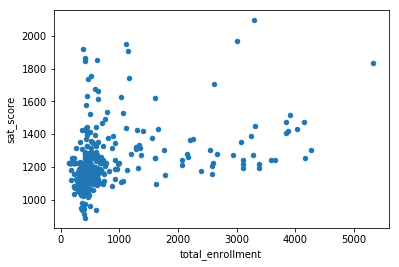

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt

combined.plot.scatter(x='total_enrollment',y='sat_score')

We can not say there is an extremely strong correlation between sat_score and total_enrollment. 
However, the cluster of points at the bottom left of points at the bottom left is interesting.This means there are a lot of observations where total_enrollment and sat_Score are both low. Let's explore this observation.

In [113]:
low_enrollment=combined.ix[(combined.total_enrollment<1000) & (combined.sat_score <1000),:]
print(low_enrollment['School Name'])

91       INTERNATIONAL COMMUNITY HIGH SCHOOL
125                                        0
126          BRONX INTERNATIONAL HIGH SCHOOL
139    KINGSBRIDGE INTERNATIONAL HIGH SCHOOL
141    INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176                                        0
179            HIGH SCHOOL OF WORLD CULTURES
188       BROOKLYN INTERNATIONAL HIGH SCHOOL
225    INTERNATIONAL HIGH SCHOOL AT PROSPECT
237               IT TAKES A VILLAGE ACADEMY
253                MULTICULTURAL HIGH SCHOOL
286    PAN AMERICAN INTERNATIONAL HIGH SCHOO
Name: School Name, dtype: object


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Let's take a look at the relationship between ell_percentage(Percentage of English language learners) and sat_score.

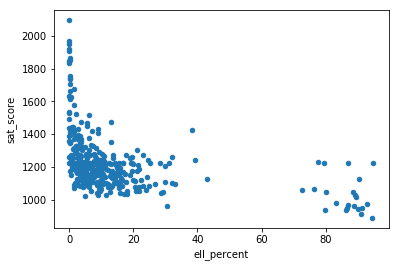

In [114]:
combined.plot.scatter(x='ell_percent',y='sat_score')

It looks like *ell_percent* correlates with *sat_score* more strongly, because the scatterplot is more linear.

We note that there is a cluster of schools that have very high *ell_percent* values and low *sat_score* values.This group coincides with the group of international high schools we investigated earlier.

In order to explore this relationship, we will map out ell_percent by school district in New York City. The map will show us which areas of the city have a lot of English language learners.

/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


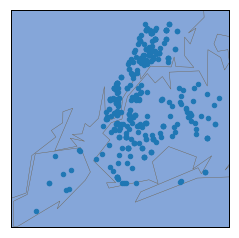

In [115]:
from mpl_toolkits.basemap import Basemap
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

longitudes=combined['lon'].tolist()
latitudes=combined['lat'].tolist()
m.scatter(longitudes,latitudes,s=20,zorder=2,latlon=True)


From the map above, we can see that school density is highest in Manhattan , and lower in Brooklyn, the Bronx, Queens, and Staten Island.

# Exploring Safety and SAT Scores

*saf_s_11* and *saf_t_11* measure how teachers and students perceive safety at schools. They both correlate highly with sat_Score. Let's dig into this relationship:

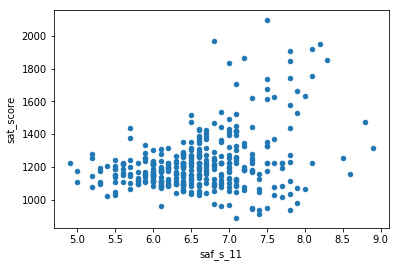

In [116]:
combined.plot.scatter(x='saf_s_11',y='sat_score')

There appears to be a correlation between SAT scores and safety, although it is not strong.

It looks like there is a group of schools with extremely high SAT scores (>1600) and high safety scores(>7.0). 

All schools with a safety score lower than 7.0 have an average SAT score that is lower than 1600.

Let's explore safety by geographic area.



/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


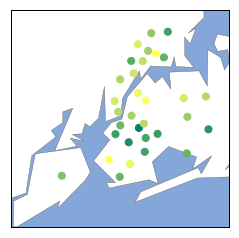

In [120]:
districts = combined.groupby("school_dist").agg(numpy.mean)
districts.reset_index(inplace=True)

m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)
m.fillcontinents(color='white',lake_color='#85A6D9')

longitudes =districts["lon"].tolist()
latitudes = districts["lat"].tolist()
m.scatter(longitudes, latitudes, s=50, zorder=2, latlon=True, c=districts["saf_s_11"], cmap="summer")
plt.show()


It seems that Upper Manhattan and parts of Queens and the Bronx tend to have lower safety scores, whereas Brooklyn has high safety scores.

# Exploring Gender and SAT Scores

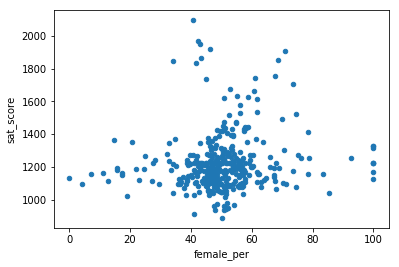

In [137]:
combined.plot.scatter("female_per", "sat_score")

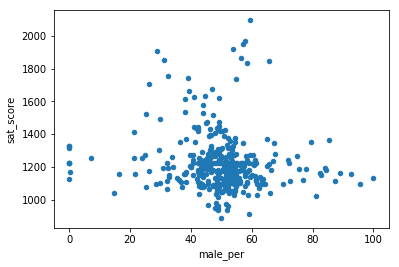

In [138]:
combined.plot.scatter("male_per", "sat_score")

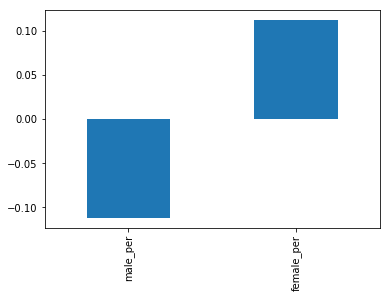

In [136]:
combined.corr()["sat_score"][["male_per", "female_per"]].plot.bar()

There is a weak correlation between SAT Scores and gender of students.
We can see that a high percentage of females at a school positively correlates with SAT score, whereas a high percentage of males at a school negatively correlates with SAT score.



